In [3]:
import numpy as np
from astropy.io import fits
from astropy.table import Table


In [4]:
ta = Table()
ta['test1'] = np.arange(0, 100.)
col1 = fits.Column(name=ta.colnames[0], format='E', array=ta)

hdu1 = fits.BinTableHDU.from_columns(fits.ColDefs([col1]))

tb = Table()
tb['test2'] = np.arange(0, 100.)
col2 = fits.Column(name=tb.colnames[0], format='E', array=tb)

hdu2 = fits.BinTableHDU.from_columns(fits.ColDefs([col2]))

# create a header
hdr = fits.Header()
hdr['Author'] = 'Me'
primary_hdu = fits.PrimaryHDU(header=hdr)

# put all the HDUs together
hdul = fits.HDUList([primary_hdu, hdu1, hdu2])

# write it out
hdul.writeto('table.fits')

In [5]:
#open the file
hdul = fits.open('table.fits')

In [6]:
hdul.info()

Filename: table.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 BinTableHDU     10   100R x 1C   [E]   
  2                1 BinTableHDU     10   100R x 1C   [E]   


In [7]:
data_1 = hdul[1].data

In [8]:
data_1

FITS_rec([( 0.,), ( 1.,), ( 2.,), ( 3.,), ( 4.,), ( 5.,), ( 6.,), ( 7.,),
          ( 8.,), ( 9.,), (10.,), (11.,), (12.,), (13.,), (14.,), (15.,),
          (16.,), (17.,), (18.,), (19.,), (20.,), (21.,), (22.,), (23.,),
          (24.,), (25.,), (26.,), (27.,), (28.,), (29.,), (30.,), (31.,),
          (32.,), (33.,), (34.,), (35.,), (36.,), (37.,), (38.,), (39.,),
          (40.,), (41.,), (42.,), (43.,), (44.,), (45.,), (46.,), (47.,),
          (48.,), (49.,), (50.,), (51.,), (52.,), (53.,), (54.,), (55.,),
          (56.,), (57.,), (58.,), (59.,), (60.,), (61.,), (62.,), (63.,),
          (64.,), (65.,), (66.,), (67.,), (68.,), (69.,), (70.,), (71.,),
          (72.,), (73.,), (74.,), (75.,), (76.,), (77.,), (78.,), (79.,),
          (80.,), (81.,), (82.,), (83.,), (84.,), (85.,), (86.,), (87.,),
          (88.,), (89.,), (90.,), (91.,), (92.,), (93.,), (94.,), (95.,),
          (96.,), (97.,), (98.,), (99.,)],
         dtype=(numpy.record, [('test1', '>f4')]))

In [9]:
#load files
from astropy.io import ascii
ta = ascii.read('/home/ade/Documents/Research/comparemodel/model_spectra_all_200.csv', format='csv')
tb = ascii.read('/home/ade/Documents/Research/comparemodel/model_spectra_all_datarelease.csv', format='csv')


In [10]:
from astropy.io import fits
hdu_list = fits.HDUList([
    fits.PrimaryHDU(),
    fits.table_to_hdu(ta),
    fits.table_to_hdu(tb), 
])
hdu_list.writeto('tables_spectra.fits')

In [14]:
hdul = fits.open('tables_spectra.fits')
hdul.info()

Filename: tables_spectra.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     20   3856R x 6C   [K, D, D, D, D, D]   
  2                1 BinTableHDU     20   4038R x 6C   [K, D, D, D, D, D]   


In [32]:
data_1 = hdul[1].data

In [36]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

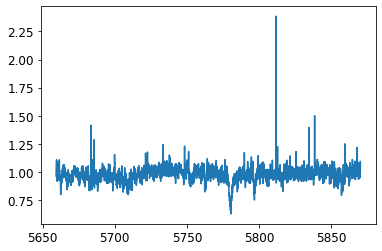

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data_1['w_obj'], data_1['f_obj'])